# Plant Disease Prediction Model

## Importing random seeds


In [ ]:
#set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

##Importing the dependencies

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

## Data curation

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentials=json.load(open("kaggle.json"))

In [ ]:
# Setting up Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME']=kaggle_credentials["username"]
os.environ['KAGGLE_KEY']=kaggle_credentials["key"]

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [00:56<00:00, 41.7MB/s]
100% 2.04G/2.04G [00:56<00:00, 38.8MB/s]


In [ ]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
#unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip",'r') as zip_ref:
  zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['grayscale', 'color', 'segmented']
38
['Cherry_(including_sour)___healthy', 'Apple___Black_rot', 'Grape___Black_rot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot']
38
['Cherry_(including_sour)___healthy', 'Apple___Black_rot', 'Grape___Black_rot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot']
38
['Cherry_(including_sour)___healthy', 'Apple___Black_rot', 'Grape___Black_rot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot']


###number of classes=38

In [ ]:
print(len(os.listdir("/content/plantvillage dataset/color/Grape___healthy")))
print(os.listdir("/content/plantvillage dataset/color/Grape___healthy")[:5])

423
['f21a88fa-5ee6-4e27-b9c1-d3a263b8cea5___Mt.N.V_HL 9024.JPG', 'eb3c315d-2ec9-4923-a602-9bce8c2db303___Mt.N.V_HL 6188.JPG', '4bd1e0f6-b69e-4936-83a2-235e6f8d7479___Mt.N.V_HL 6044.JPG', 'b7b4fb14-c350-4c88-8a2c-2e35c239af6a___Mt.N.V_HL 9051.JPG', '3c93bbb2-e1cc-4a12-9758-e6a9ff0e70dc___Mt.N.V_HL 8916.JPG']


###data processing

In [ ]:
#data path
base_dir='plantvillage dataset/color'

(256, 256, 3)


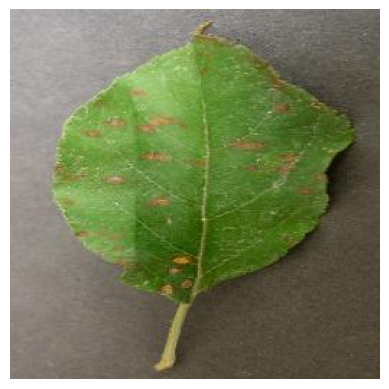

In [ ]:
image_path='/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

#read the image
img=mpimg.imread(image_path)

print(img.shape)
#display the image
plt.imshow(img)
plt.axis('off') #turn off axis numbers
plt.show()

In [ ]:
image_path='/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

#read the image
img=mpimg.imread(image_path)

print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [ ]:
#image parameters
img_size=224
batch_size=32

###Train test

In [ ]:
#image data generators
data_gen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
#Train generator
train_generator=data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
#validation generator
validation_generator=data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


###convolutional neural network

In [ ]:
# model definition
model=models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [ ]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [ ]:
# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### model training

In [ ]:
# training the model
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size
)

Epoch 1/5
1358/1358 [==============================] - 114s 80ms/step - loss: 0.9735 - accuracy: 0.7342 - val_loss: 0.4416 - val_accuracy: 0.8609
Epoch 2/5
1358/1358 [==============================] - 106s 78ms/step - loss: 0.2853 - accuracy: 0.9098 - val_loss: 0.4053 - val_accuracy: 0.8725
Epoch 3/5
1358/1358 [==============================] - 102s 75ms/step - loss: 0.1327 - accuracy: 0.9565 - val_loss: 0.4611 - val_accuracy: 0.8797
Epoch 4/5
1358/1358 [==============================] - 103s 76ms/step - loss: 0.0854 - accuracy: 0.9720 - val_loss: 0.5540 - val_accuracy: 0.8692
Epoch 5/5
1358/1358 [==============================] - 105s 77ms/step - loss: 0.0793 - accuracy: 0.9742 - val_loss: 0.7213 - val_accuracy: 0.8440


### model evaluation

In [ ]:
# model evaluation
print("evaluating model...")
val_loss, val_accuracy= model.evaluate(validation_generator, steps=validation_generator.samples//batch_size)
print(f"validation accuracy: {val_accuracy*100:.2f}%")

evaluating model...
339/339 [==============================] - 18s 54ms/step - loss: 0.7213 - accuracy: 0.8440
validation accuracy: 84.40%


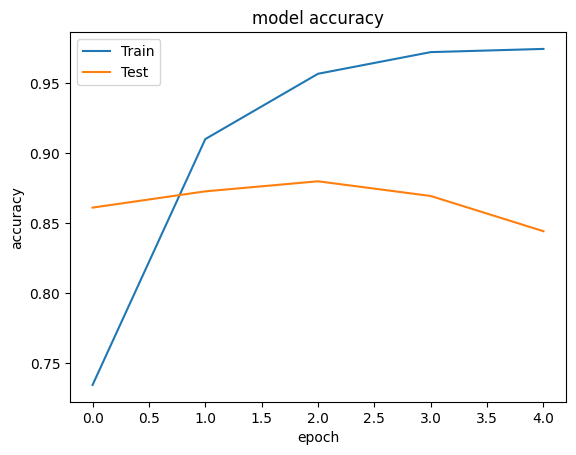

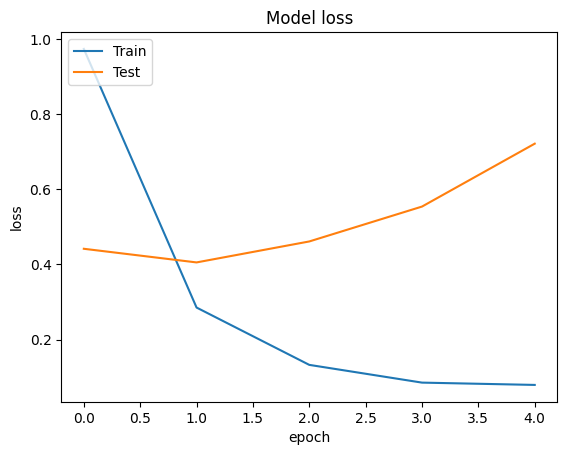

In [ ]:
# plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

#plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

###building a predictive system

In [ ]:
# function to load and preprocess the image
def load_and_preprocess_image(image_path, target_size=(224,224)):
  img=Image.open(image_path)
  img=img.resize(target_size)
  img_array=np.array(img)
  img_array=np.expand_dims(img_array,axis=0)
  img_array=img_array.astype('float32')/255.
  return img_array

# function to predict the class of an image
def predict_image_class(model, image_path, class_indices):
  preprocessed_img=load_and_preprocess_image(image_path)
  predictions=model.predict(preprocessed_img)
  predicted_class_index=np.argmax(predictions,axis=1)[0]
  predicted_class_name=class_indices[predicted_class_index]
  return predicted_class_name

In [ ]:
# create a mapping from class indices to class names
class_indices={v:k for k,v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
#saving the class names as json file
json.dump(class_indices,open('class_indices.json','w'))

In [ ]:
def plot_image(image_path, predicted_class_name):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class_name}')
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 294ms/step
Predicted class name: Tomato___Late_blight


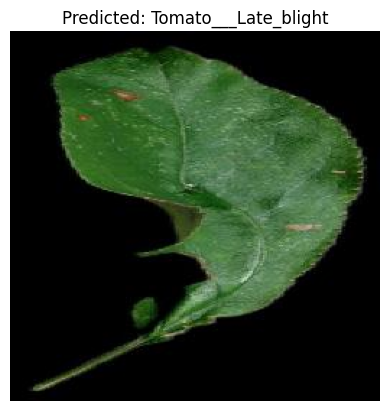

In [ ]:
image_path='/content/plantvillage dataset/segmented/Apple___Black_rot/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727_final_masked.jpg'
predicted_class_name=predict_image_class(model,image_path, class_indices)

#output the result
print("Predicted class name:", predicted_class_name)
plot_image(image_path, predicted_class_name)

1/1 [==============================] - 0s 17ms/step
Predicted class name: Strawberry___Leaf_scorch


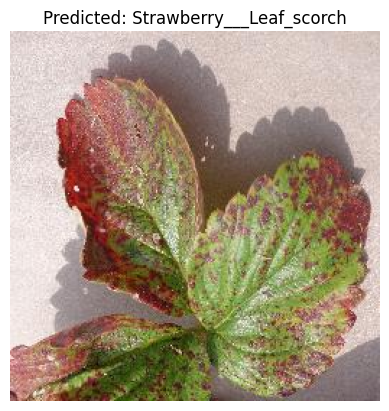

In [ ]:
image_path='/content/plantvillage dataset/color/Strawberry___Leaf_scorch/01f11949-54ba-4c0e-afb7-1e435ecac63a___RS_L.Scorch 0045.JPG'
predicted_class_name=predict_image_class(model,image_path, class_indices)

#output the result
print("Predicted class name:", predicted_class_name)
plot_image(image_path, predicted_class_name)

1/1 [==============================] - 0s 20ms/step
Predicted class name: Apple___Black_rot


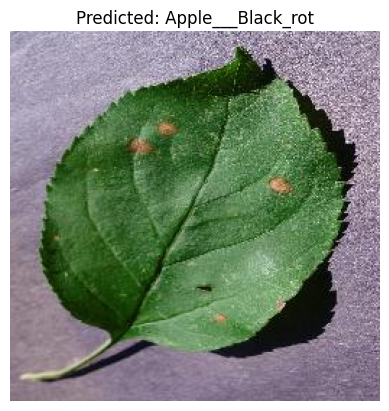

In [ ]:
image_path='/content/plantvillage dataset/color/Apple___Black_rot/02168189-aa75-4284-a7f0-8ca5901ea783___JR_FrgE.S 2948.JPG'
predicted_class_name=predict_image_class(model,image_path, class_indices)

#output the result
print("Predicted class name:", predicted_class_name)
plot_image(image_path, predicted_class_name)

1/1 [==============================] - 0s 26ms/step
Predicted class name: Corn_(maize)___Common_rust_


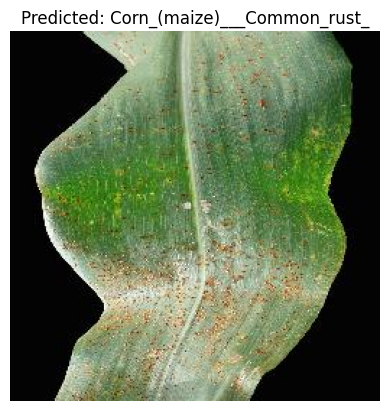

In [ ]:
image_path='/content/plantvillage dataset/color/Corn_(maize)___Common_rust_/RS_Rust 1567.JPG'
predicted_class_name=predict_image_class(model,image_path, class_indices)

#output the result
print("Predicted class name:", predicted_class_name)
plot_image(image_path, predicted_class_name)

save the model to google drive or local

In [ ]:
model.save('Plant_Disease_Prediction_Model')